# Telco Customer Churn Analysis

## Overview
This project analyzes customer churn for a telecommunications company. The goal is to predict whether a customer will churn (leave the service) based on their demographics, service usage, and billing information. The project includes data preprocessing, exploratory data analysis (EDA), feature engineering, model selection, hyperparameter tuning, and evaluation.

## Dataset
The dataset used in this project is `Telco_customer_churn.csv`, which contains customer information such as:
- Demographics (e.g., gender, senior citizen status)
- Service details (e.g., phone service, internet service)
- Billing information (e.g., monthly charges, total charges)
- Churn status (target variable)


## Steps
1. **Data Preprocessing**: Handle missing values, encode categorical variables, and scale numeric features.
2. **Exploratory Data Analysis (EDA)**: Visualize relationships between features and the target variable.
3. **Feature Selection**: Use univariate feature selection to identify the most important features.
4. **Model Selection**: Evaluate multiple models (e.g., Logistic Regression, Random Forest, XGBoost) using cross-validation.
5. **Hyperparameter Tuning**: Optimize model parameters using GridSearchCV.
6. **Model Evaluation**: Assess the best model's performance using metrics like accuracy, precision, recall, F1 score, and ROC AUC.

## Results
The best-performing model achieved the following metrics on the test set:
- **Accuracy**: 0.82
- **Precision**: 0.75
- **Recall**: 0.60
- **F1 Score**: 0.67
- **ROC AUC Score**: 0.85

## How to Run
1. Clone this repository:
   ```bash
   git clone https://github.com/your-username/Telco_Customer_Churn_Analysis.git

## 0. Import Libraries
Import all necessary libraries for data processing, modeling, and evaluation.

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import catboost as cb
import warnings
warnings.filterwarnings('ignore') 

## 1. Read Dataset
Load the dataset into a pandas DataFrame and specify data types for each column.

In [20]:
data_types = {
    # Customer Identification and Location
    'CustomerID': 'category',
    'Country': 'category',
    'State': 'category',
    'City': 'category',
    'Zip Code': 'Int64',
    'Lat Long': 'category',
    'Latitude': 'Float64',
    'Longitude': 'Float64',
    
    # Demographics
    'Gender': 'category',
    'Senior Citizen': 'category',
    'Partner': 'category',
    'Dependents': 'category',
    
    # Service Information
    'Tenure Months': 'Int64',
    'Phone Service': 'category',
    'Multiple Lines': 'category',
    'Internet Service': 'category',
    'Online Security': 'category',
    'Online Backup': 'category',
    'Device Protection': 'category',
    'Tech Support': 'category',
    'Streaming TV': 'category',
    'Streaming Movies': 'category',
    
    # Contract and Billing
    'Contract': 'category',
    'Paperless Billing': 'category',
    'Payment Method': 'category',
    'Monthly Charges': 'Float64',
    'Total Charges': 'Float64',  # String because it might contain special characters
    
    # Churn Information
    'Churn Label': 'category',
    'CLTV': 'Int64',
    'Churn Reason': 'category'
}

# Read the CSV file 'Telco_customer_churn.csv' into a DataFrame.
# The 'na_values' parameter specifies which values should be treated as missing (NaN).
# The 'dtype' parameter ensures that the columns are read with the specified data types.
df = pd.read_csv('Telco_customer_churn.csv', na_values=[" ", "", "NA", "N/A"], dtype=data_types)

In [21]:
# Display the DataFrame to inspect the data.
df

CustomerID        Country       State          City  Zip Code  \
0     3668-QPYBK  United States  California   Los Angeles     90003   
1     9237-HQITU  United States  California   Los Angeles     90005   
2     9305-CDSKC  United States  California   Los Angeles     90006   
3     7892-POOKP  United States  California   Los Angeles     90010   
4     0280-XJGEX  United States  California   Los Angeles     90015   
...          ...            ...         ...           ...       ...   
7038  2569-WGERO  United States  California       Landers     92285   
7039  6840-RESVB  United States  California      Adelanto     92301   
7040  2234-XADUH  United States  California         Amboy     92304   
7041  4801-JZAZL  United States  California  Angelus Oaks     92305   
7042  3186-AJIEK  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0     33.964131, -118.272783  33.964131 -118.272783    Male             No   
1      34.059281, -118.30742  34.059281  -118.30742  Female             No   
2     34.048013, -118.293953  34.048013 -118.293953  Female             No   
3     34.062125, -118.315709  34.062125 -118.315709  Female             No   
4     34.039224, -118.266293  34.039224 -118.266293    Male             No   
...                      ...        ...         ...     ...            ...   
7038  34.341737, -116.539416  34.341737 -116.539416  Female             No   
7039  34.667815, -117.536183  34.667815 -117.536183    Male             No   
7040  34.559882, -115.637164  34.559882 -115.637164  Female             No   
7041     34.1678, -116.86433    34.1678  -116.86433  Female             No   
7042  34.424926, -117.184503  34.424926 -117.184503    Male             No   

      ...         Streaming TV     Streaming Movies        Contract  \
0     ...                   No                   No  Month-to-month   
1     ...                   No                   No  Month-to-month   
2     ...                  Yes                  Yes  Month-to-month   
3     ...                  Yes                  Yes  Month-to-month   
4     ...                  Yes                  Yes  Month-to-month   
...   ...                  ...                  ...             ...   
7038  ...  No internet service  No internet service        Two year   
7039  ...                  Yes                  Yes        One year   
7040  ...                  Yes                  Yes        One year   
7041  ...                   No                   No  Month-to-month   
7042  ...                  Yes                  Yes        Two year   

     Paperless Billing             Payment Method Monthly Charges  \
0                  Yes               Mailed check           53.85   
1                  Yes           Electronic check            70.7   
2                  Yes           Electronic check           99.65   
3                  Yes           Electronic check           104.8   
4                  Yes  Bank transfer (automatic)           103.7   
...                ...                        ...             ...   
7038               Yes  Bank transfer (automatic)           21.15   
7039               Yes               Mailed check            84.8   
7040               Yes    Credit card (automatic)           103.2   
7041               Yes           Electronic check            29.6   
7042               Yes  Bank transfer (automatic)          105.65   

     Total Charges Churn Label  CLTV                   Churn Reason  
0           108.15         Yes  3239   Competitor made better offer  
1           151.65         Yes  2701                          Moved  
2            820.5         Yes  5372                          Moved  
3          3046.05         Yes  5003                          Moved  
4           5036.3         Yes  5340  Competitor had better devices  
...            ...         ...   ...                            ...  
7038        1419.4          No  5306        

In [22]:
# Display summary information about the DataFrame, including the data types of each column and the number of non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7043 non-null   category
 1   Country            7043 non-null   category
 2   State              7043 non-null   category
 3   City               7043 non-null   category
 4   Zip Code           7043 non-null   Int64   
 5   Lat Long           7043 non-null   category
 6   Latitude           7043 non-null   Float64 
 7   Longitude          7043 non-null   Float64 
 8   Gender             7043 non-null   category
 9   Senior Citizen     7043 non-null   category
 10  Partner            7043 non-null   category
 11  Dependents         7043 non-null   category
 12  Tenure Months      7043 non-null   Int64   
 13  Phone Service      7043 non-null   category
 14  Multiple Lines     7043 non-null   category
 15  Internet Service   7043 non-null   category
 16  Online

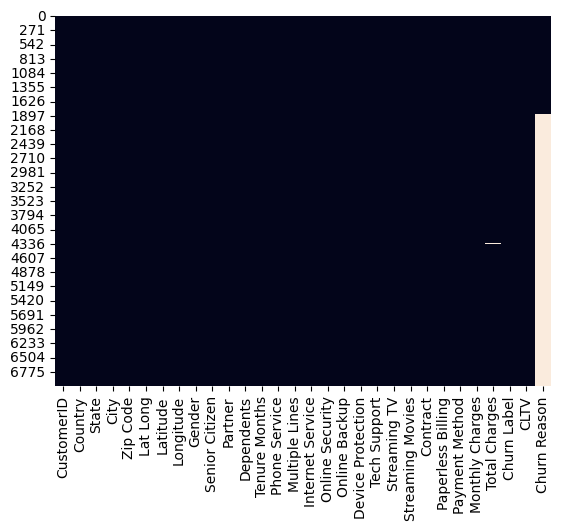

In [23]:
# Create a heatmap to visualize missing values in the DataFrame.
# The 'isnull()' function returns a DataFrame of boolean values indicating missing data.
# The 'cbar=False' parameter removes the color bar from the heatmap.
sns.heatmap(df.isnull(), cbar=False);

In [24]:
# Drop the 'Churn Reason' and 'CustomerID' columns from the DataFrame.
# The 'axis=1' parameter specifies that columns are being dropped.
df = df.drop(df[['Churn Reason', 'CustomerID']], axis=1)

# Display the updated DataFrame to confirm the columns have been removed.
df

Country       State          City  Zip Code  \
0     United States  California   Los Angeles     90003   
1     United States  California   Los Angeles     90005   
2     United States  California   Los Angeles     90006   
3     United States  California   Los Angeles     90010   
4     United States  California   Los Angeles     90015   
...             ...         ...           ...       ...   
7038  United States  California       Landers     92285   
7039  United States  California      Adelanto     92301   
7040  United States  California         Amboy     92304   
7041  United States  California  Angelus Oaks     92305   
7042  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0     33.964131, -118.272783  33.964131 -118.272783    Male             No   
1      34.059281, -118.30742  34.059281  -118.30742  Female             No   
2     34.048013, -118.293953  34.048013 -118.293953  Female             No   
3     34.062125, -118.315709  34.062125 -118.315709  Female             No   
4     34.039224, -118.266293  34.039224 -118.266293    Male             No   
...                      ...        ...         ...     ...            ...   
7038  34.341737, -116.539416  34.341737 -116.539416  Female             No   
7039  34.667815, -117.536183  34.667815 -117.536183    Male             No   
7040  34.559882, -115.637164  34.559882 -115.637164  Female             No   
7041     34.1678, -116.86433    34.1678  -116.86433  Female             No   
7042  34.424926, -117.184503  34.424926 -117.184503    Male             No   

     Partner  ...         Tech Support         Streaming TV  \
0         No  ...                   No                   No   
1         No  ...                   No                   No   
2         No  ...                   No                  Yes   
3        Yes  ...                  Yes                  Yes   
4         No  ...                   No                  Yes   
...      ...  ...                  ...                  ...   
7038      No  ...  No internet service  No internet service   
7039     Yes  ...                  Yes                  Yes   
7040     Yes  ...                   No                  Yes   
7041     Yes  ...                   No                   No   
7042      No  ...                  Yes                  Yes   

         Streaming Movies        Contract Paperless Billing  \
0                      No  Month-to-month               Yes   
1                      No  Month-to-month               Yes   
2                     Yes  Month-to-month               Yes   
3                     Yes  Month-to-month               Yes   
4                     Yes  Month-to-month               Yes   
...                   ...             ...               ...   
7038  No internet service        Two year               Yes   
7039                  Yes        One year               Yes   
7040                  Yes        One year               Yes   
7041                   No  Month-to-month               Yes   
7042                  Yes        Two year               Yes   

                 Payment Method Monthly Charges Total Charges Churn Label  \
0                  Mailed check           53.85        108.15         Yes   
1              Electronic check            70.7        151.65         Yes   
2              Electronic check           99.65         820.5         Yes   
3              Electronic check           104.8       3046.05         Yes   
4     Bank transfer (automatic)           103.7        5036.3         Yes   
...                         ...             ...           ...         ...   
7038  Bank transfer (automatic)           21.15        1419.4          No   
7039               Mailed check            84.8        1990.5          No   
7040    Credit card (automatic)           103.2        7362.9          No   
7041           Electronic check            29.6        346.45          No   
7042 

In [25]:
# Display the list of columns in the DataFrame to verify the remaining columns.
df.columns

Index(['Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude',
       'Longitude', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'CLTV'],
      dtype='object')

## 2. Data Preprocessing
Handle missing values, encode categorical variables, and scale numeric features.

In [26]:
# Check for missing values in each column of the DataFrame.
# The 'isna().sum()' function counts the number of missing values in each column.
df.isna().sum()

Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
CLTV                  0
dtype: int64

In [27]:
# Display the 'Total Charges' column to inspect its values.
df['Total Charges']

0        108.15
1        151.65
2         820.5
3       3046.05
4        5036.3
         ...   
7038     1419.4
7039     1990.5
7040     7362.9
7041     346.45
7042     6844.5
Name: Total Charges, Length: 7043, dtype: Float64

In [28]:
# Fill missing values in the 'Total Charges' column with the median value of the column.
# The 'inplace=True' parameter ensures the changes are applied directly to the DataFrame.
df['Total Charges'].fillna(df['Total Charges'].median(), inplace=True)

In [29]:
# Display the 'Total Charges' column again to confirm the missing values have been filled.
df['Total Charges']

0        108.15
1        151.65
2         820.5
3       3046.05
4        5036.3
         ...   
7038     1419.4
7039     1990.5
7040     7362.9
7041     346.45
7042     6844.5
Name: Total Charges, Length: 7043, dtype: Float64

## 3. Exploratory Data Analysis (EDA)
Visualize relationships between features and the target variable to gain insights.

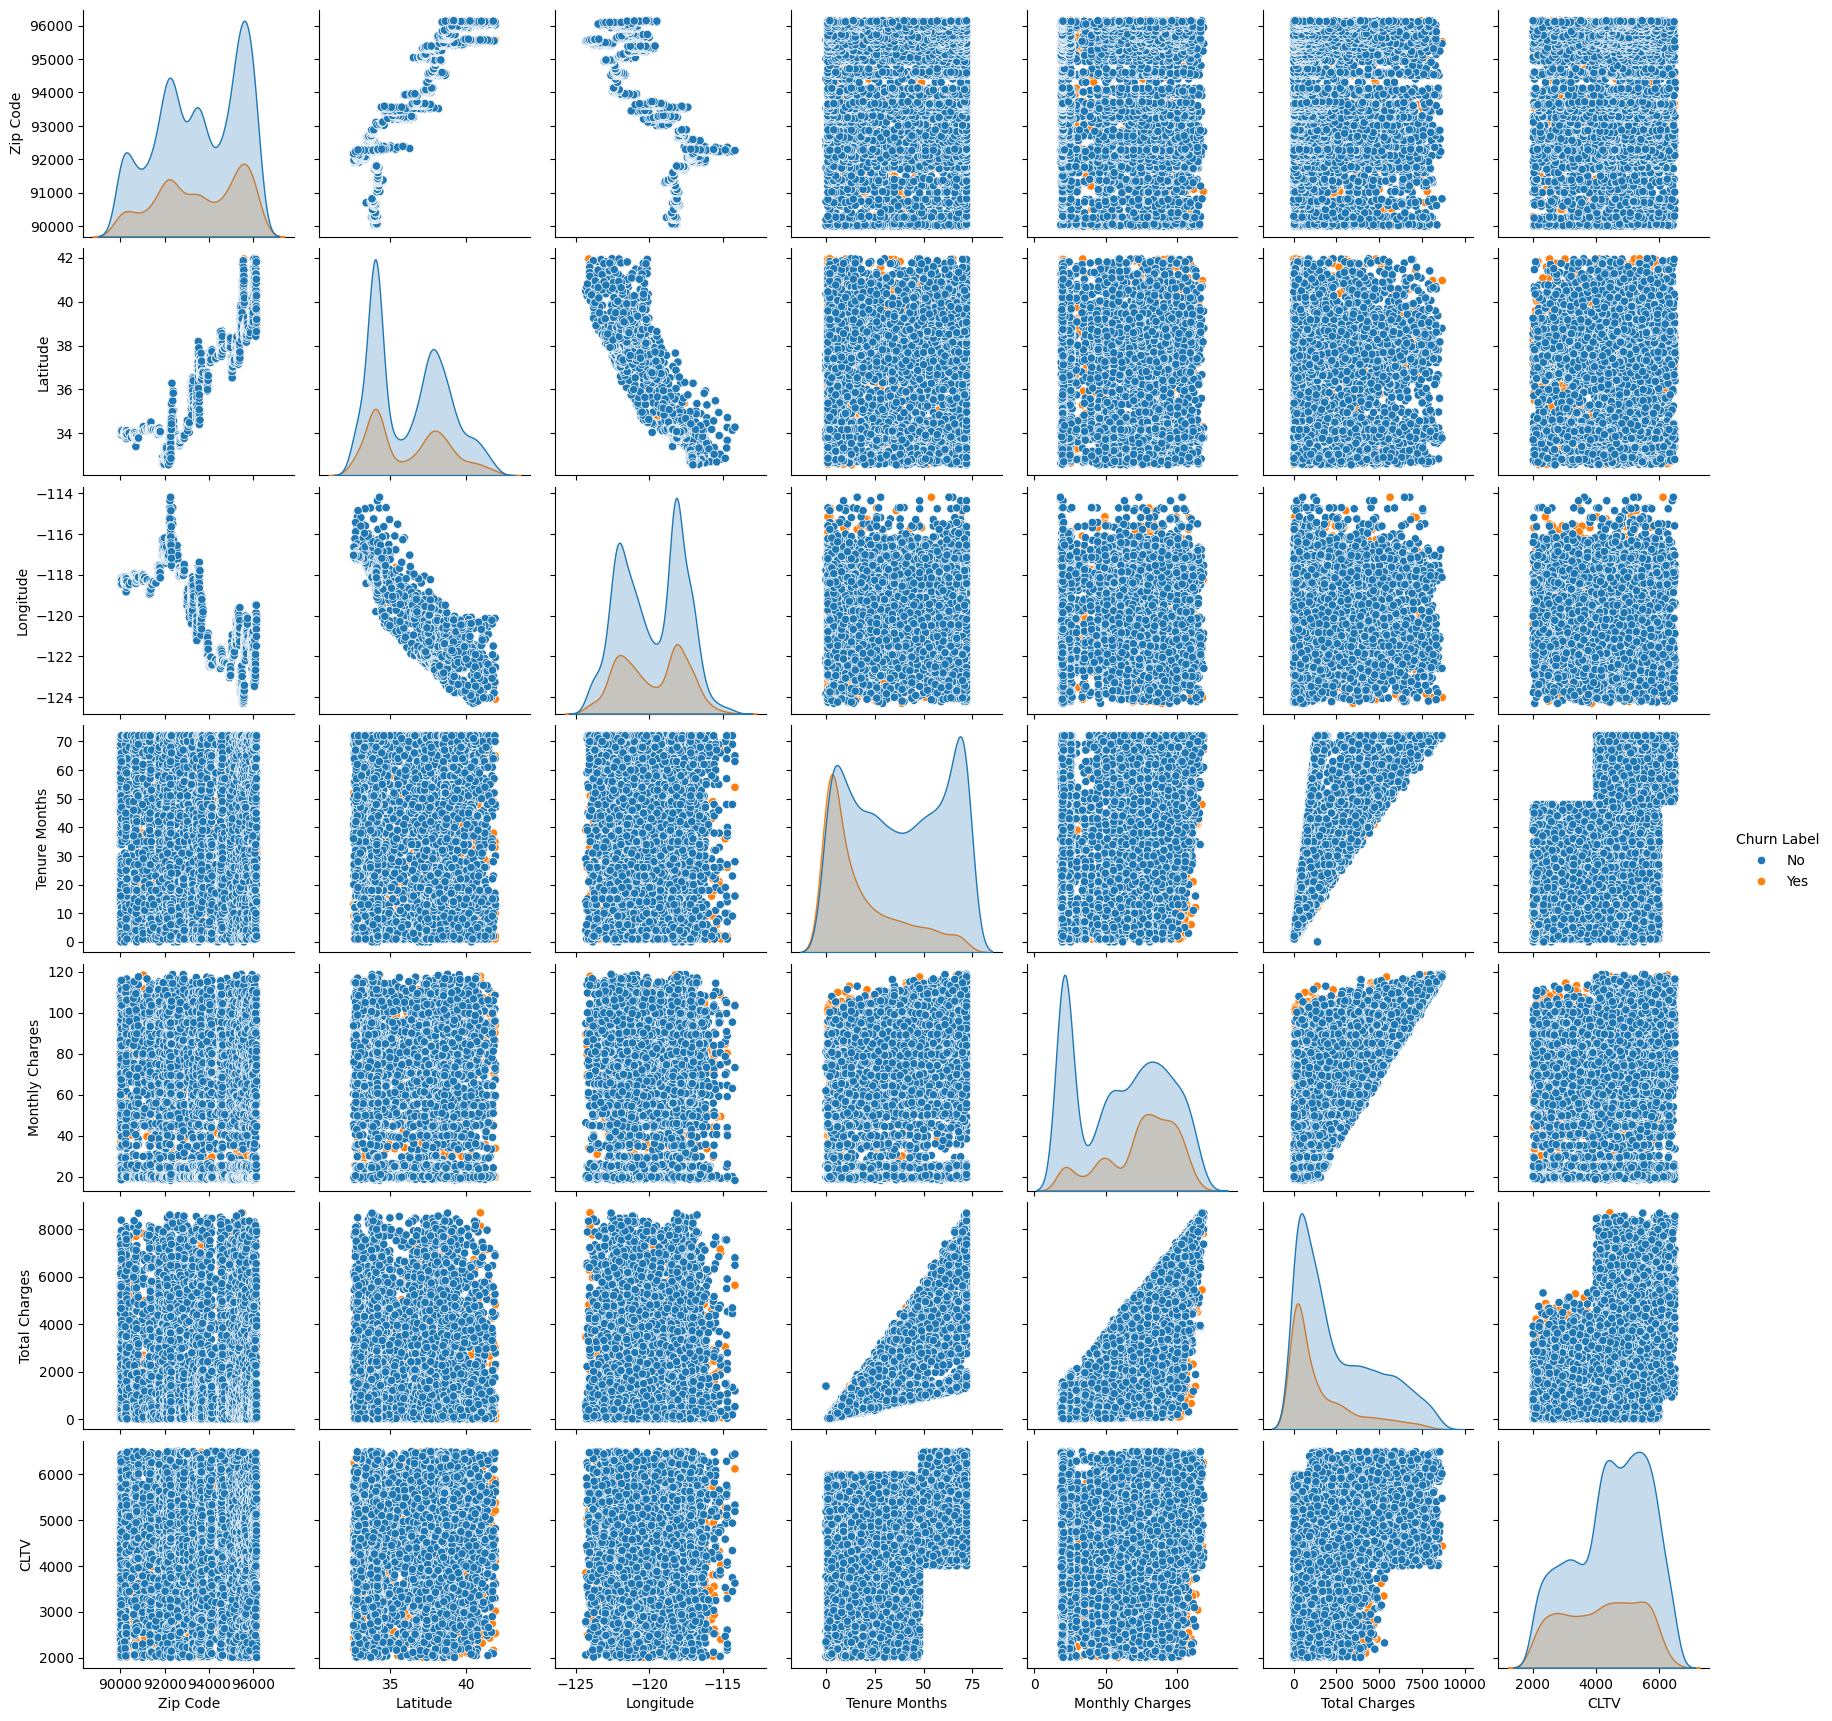

In [30]:
# Create a pairplot to visualize relationships between numerical columns in the DataFrame.
# The 'hue' parameter is set to 'Churn Label' to color-code the data points based on churn status.
sns.pairplot(df, hue='Churn Label');

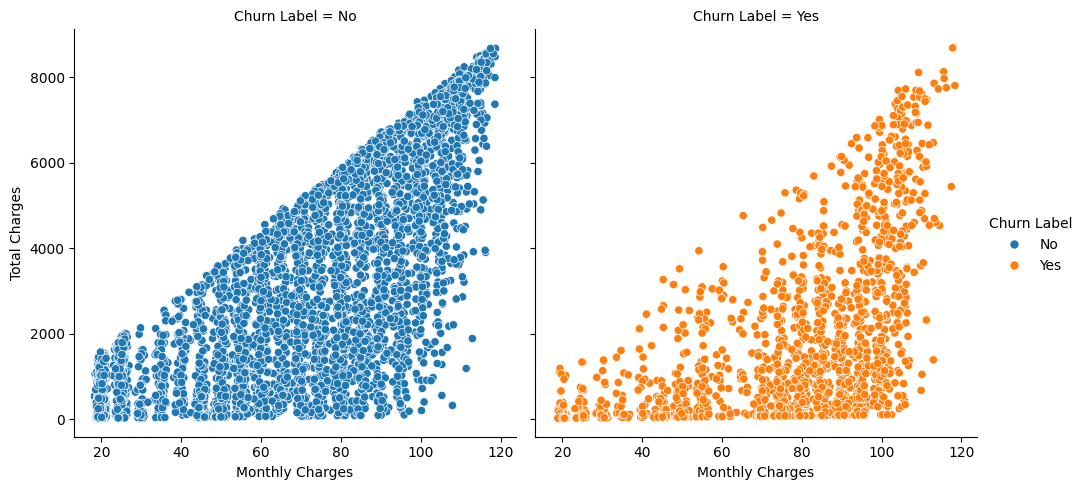

In [31]:
# Create a relational plot to visualize the relationship between 'Monthly Charges' and 'Total Charges'.
# The 'col' parameter creates separate subplots for each unique value in 'Churn Label'.
# The 'hue' parameter color-codes the data points based on churn status.
sns.relplot(x='Monthly Charges', y='Total Charges', col='Churn Label', hue='Churn Label', data=df);

## 4. Train-Test Split
Split the dataset into training and testing sets for model evaluation.

In [32]:
# Step 1: Prepare the data
target = 'Churn Label'
X = df.drop(target, axis=1)  # Features
y = df[target]  # Target variable

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Convert target variable to numeric (0 for 'No', 1 for 'Yes')
y = y.map({'No': 0, 'Yes': 1})

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 3: Preprocessing
numeric_imputer = SimpleImputer(strategy='mean')  # For numeric features
categorical_imputer = SimpleImputer(strategy='most_frequent')  # For categorical features

# Encode categorical variables
categorical_encoder = OneHotEncoder(handle_unknown='ignore')

# Scale numeric features
numeric_scaler = StandardScaler()

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create a preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('imputer', numeric_imputer), ('scaler', numeric_scaler)]), numeric_features),
        ('cat', Pipeline(steps=[('imputer', categorical_imputer), ('encoder', categorical_encoder)]), categorical_features)
    ])

## 5. Feature Selection
Use univariate feature selection to identify the most important features.

In [33]:
# Step 4: Feature Selection
# Univariate feature selection
selector = SelectKBest(score_func=f_classif, k=8)  # Select top 8 features

# Combine preprocessing and feature selection
feature_selection_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector)
])

## 6. Model Selection
Evaluate multiple models (e.g., Logistic Regression, Random Forest, XGBoost) using cross-validation.

In [34]:
# Step 5: Model Selection
# Define a set of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'CatBoost': cb.CatBoostClassifier(verbose=0)
}

# Evaluate models using cross-validation
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

Logistic Regression: Mean Accuracy = 0.7846, Std = 0.0117
Random Forest: Mean Accuracy = 0.7824, Std = 0.0130
Gradient Boosting: Mean Accuracy = 0.7876, Std = 0.0113
XGBoost: Mean Accuracy = 0.7631, Std = 0.0074
CatBoost: Mean Accuracy = 0.7809, Std = 0.0105


## 7. Hyperparameter Tuning
Optimize model parameters using GridSearchCV to improve performance.

In [35]:
# Step 6: Hyperparameter Tuning
# Define the parameter grid for each model
param_grids = {
    'Logistic Regression': {'model__C': [0.1, 1, 10]},
    'Random Forest': {'model__n_estimators': [100, 200], 'model__max_depth': [None, 10, 20]},
    'Gradient Boosting': {'model__n_estimators': [100, 200], 'model__max_depth': [3, 5, 10]},
    'XGBoost': {'model__n_estimators': [100, 200], 'model__max_depth': [3, 5, 10]},
    'CatBoost': {'model__iterations': [100, 200], 'model__depth': [4, 6, 10]}
}

# Perform grid search for each model
best_models = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters = {grid_search.best_params_}")

# Step 7: Train the Final Model
# Select the best model based on cross-validation results
best_model_name = max(best_models, key=lambda k: best_models[k].score(X_test, y_test))
best_model = best_models[best_model_name]
print(f"Best Model: {best_model_name}")

Logistic Regression: Best Parameters = {'model__C': 0.1}
Random Forest: Best Parameters = {'model__max_depth': 10, 'model__n_estimators': 200}
Gradient Boosting: Best Parameters = {'model__max_depth': 3, 'model__n_estimators': 100}
XGBoost: Best Parameters = {'model__max_depth': 3, 'model__n_estimators': 100}
CatBoost: Best Parameters = {'model__depth': 4, 'model__iterations': 100}
Best Model: CatBoost


## 8. Model Evaluation
Assess the best model's performance using metrics like accuracy, precision, recall, F1 score, and ROC AUC.

In [36]:
# Step 8: Evaluate the Model
# Predict on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # For probabilistic metrics

# Calculate and print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7851396119261713
Precision: 0.639686684073107
Recall: 0.43672014260249553
F1 Score: 0.5190677966101694
ROC AUC Score: 0.8196932943749197
Confusion Matrix:
 [[1414  138]
 [ 316  245]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.64      0.44      0.52       561

    accuracy                           0.79      2113
   macro avg       0.73      0.67      0.69      2113
weighted avg       0.77      0.79      0.77      2113



## 9. Save the Model
Save the best-trained model to a file for future use or deployment.

In [38]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_model.pkl')

# Load the model (for future use)
loaded_model = joblib.load('best_model.pkl')